<a href="https://colab.research.google.com/github/thiagoxgomes/DNC-GIT/blob/main/Mini_projeto_Roof_im%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Mini Projeto - Roof Imóveis**






In [149]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
pd.options.display.float_format = "{:.2f}".format
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

**- Business understanding**

Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro 
e quer expandir sua área de atuação fazendo um investimento internacional, 
com isso, ela contratou você para uma consultoria estratégica.
A empresa irá investir em imóveis no Condado de County, nos Estados 
Unidos.

- Qual a minha meta?

saber qual seria os 5 imóveis que ela deveria investir e o porquê e quais 5 você não recomendaria o investimento de jeito nenhum.

Estratégia 1:

Imóveis com grandes área e valores muito acima da média, serão elimanados da ánalise visto que essa caracteristica de imóveis são mais difícies de vender. Assim eliminaremos dados da analise de imoveis que não serão obervados e evitaremos possíveis outliers.
- Foi desconsiderado imóveis com valores a cima de 1,5 milhões conforme analise de gráfico de caixa. Foi desconsiderado os outliers

- Foi desconsiderado imóveis com áreas internas a cima de 4.500 FT conforme analise de gráfico de caixa. Foi desconsiderado os outliers


- Foi desconsiderado imóveis com áreas externa a cima de 17.500 FT conforme analise de gráfico de caixa. Foi desconsiderado os outliers


Segunda estratégia:

Calcular o valor médio do metro quadrado/ft das regiões do condado, para se juntar com a média dos 15 imóveis mais próximos, e analisar os riscos de compra dos imovéis que possuem um valor com uma dispoersão significativa dessa média.

Terceira estratégia:

Verificar relação Ano de contrução x Ano de restauração x preço.


 - Como posso chegar?
Os imoveis deverão ser agrupados por região para o cálculo da média. 
Será necessário identificar o Bairro através do CEP.

 - Dados disponíveis 
 Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

 - Não será necessário outras fontes de dados.




In [97]:
df = pd.read_csv('/content/kc_house_data.csv')

# - Data understanding

 A Coleta de Dados:
 - Os dados que eu tenho fazem sentido?
 - Estão no formato que eu gostaria?

 Será necessário corrigir formato dos preços do tipo float com 2 zeros na casa decimal para melhor analise de valores e média. Foi utilizado a função "pd.options.display.float_format"

 - O que mais eu consigo obter de informação destes dados?

Dataset detalhado: 
https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#df.shape

#df.isnull().sum() / df.shape[0]
#df[df["price"]>2500000]
#df["sqft_living"].describe()
#df["price"].describe()
#df[df["price"]==7.500000e+04]



In [ ]:
#pd.options.display.float_format = "{:.2f}".format   ## função para alterar quantidade de zeros depois do ponto 
df["price"].describe()



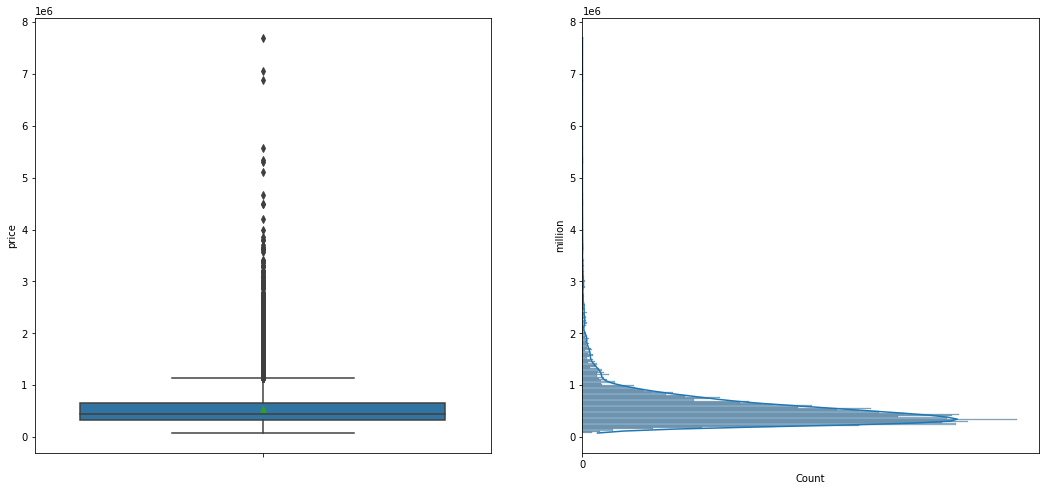

In [107]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(column = ['price']).set_ylabel('million')
sns.boxplot(data=df, y='price' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df, y='price' , kde=True, ax=axes[1])

plt.show()

In [ ]:
df["sqft_living"].describe()

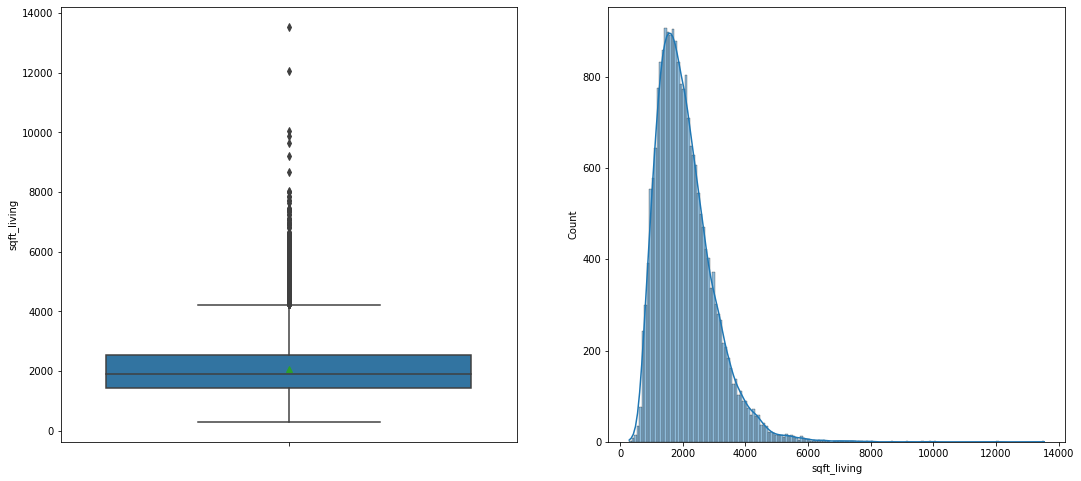

In [105]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(data=df, y='sqft_living' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df, x='sqft_living' , kde=True, ax=axes[1])

plt.show()

In [ ]:
#df["sqft_lot"].describe()
df_1 = df[df["sqft_lot"]<20688]
df_1["sqft_lot"].describe()

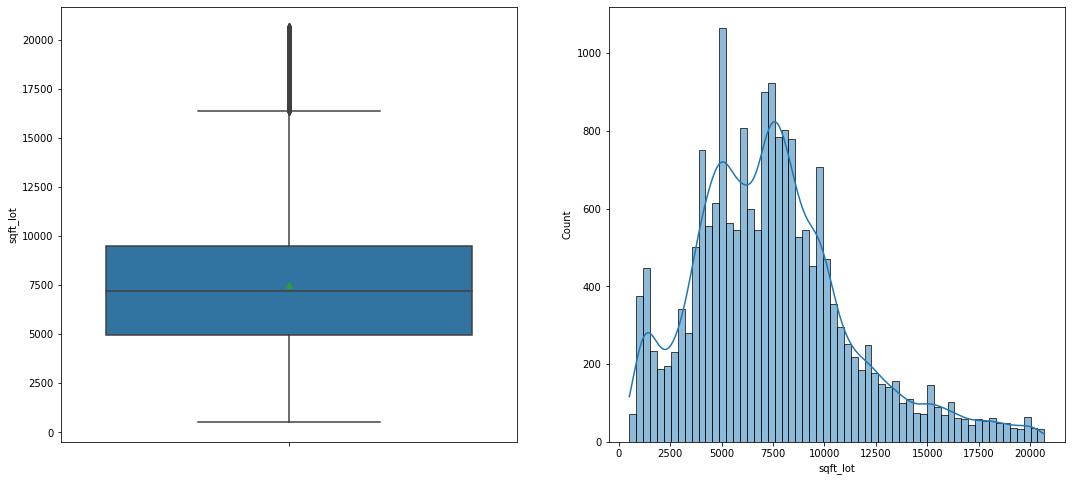

In [119]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(data=df_1, y='sqft_lot' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df_1, x='sqft_lot' , kde=True, ax=axes[1])

plt.show()

In [ ]:
df["bedrooms"].describe()
fig,axes = plt.subplots(ncols=2, figsize=(18,8))
sns.boxplot(data=df_1, y='bedrooms' , ax=axes[0], showmeans=True)    ###para ver mediana e outlies
sns.histplot(data=df_1, x='bedrooms' , kde=True, ax=axes[1])

plt.show()


# **Data preparation**




In [152]:
## PEGANDO LOCALIZAÇÃO UTILIZANDO ATRAVÉS DO ZIPCODE
# Zipcode input
zipcode = "98178"
 
# Using geocode()
location = geolocator.geocode(zipcode)
 
# Displaying address details
print("Zipcode:",zipcode)
print(location)

Zipcode: 98178
King County, Washington, 98178, United States


In [148]:
#filtro para remoção de outliers
df_new = df[(df["price"]<=1500000) & (df["sqft_living"]<=4500) & (df["sqft_lot"]<=17500)]
df_new.zipcode 

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 18540, dtype: int64